# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Loading-CfA-SN-lightcurves" data-toc-modified-id="Loading-CfA-SN-lightcurves-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading CfA SN lightcurves</a></div><div class="lev2 toc-item"><a href="#start-here" data-toc-modified-id="start-here-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>start here</a></div><div class="lev3 toc-item"><a href="#Fig-0" data-toc-modified-id="Fig-0-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Fig 0</a></div><div class="lev1 toc-item"><a href="#Finally-Gaussian-Processes" data-toc-modified-id="Finally-Gaussian-Processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finally Gaussian Processes</a></div><div class="lev2 toc-item"><a href="#GP-in-natural-time-space-(hp-=-100)" data-toc-modified-id="GP-in-natural-time-space-(hp-=-100)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GP in natural time space (hp = 100)</a></div><div class="lev3 toc-item"><a href="#Fig-2:" data-toc-modified-id="Fig-2:-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Fig 2:</a></div><div class="lev3 toc-item"><a href="#Fig-3:" data-toc-modified-id="Fig-3:-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Fig 3:</a></div><div class="lev2 toc-item"><a href="#GP-in-log-space-(hp-=-1)" data-toc-modified-id="GP-in-log-space-(hp-=-1)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GP in log space (hp = 1)</a></div><div class="lev3 toc-item"><a href="#Fig-3" data-toc-modified-id="Fig-3-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Fig 3</a></div><div class="lev1 toc-item"><a href="#Dependency-of-fit-on-hyperparameters" data-toc-modified-id="Dependency-of-fit-on-hyperparameters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dependency of fit on hyperparameters</a></div><div class="lev3 toc-item"><a href="#Fig-4" data-toc-modified-id="Fig-4-301"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Fig 4</a></div><div class="lev1 toc-item"><a href="#Increasing-the-data-uncertainty-(hp-=-0.1)" data-toc-modified-id="Increasing-the-data-uncertainty-(hp-=-0.1)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Increasing the data uncertainty (hp = 0.1)</a></div><div class="lev3 toc-item"><a href="#Fig-5:" data-toc-modified-id="Fig-5:-401"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Fig 5:</a></div><div class="lev2 toc-item"><a href="#Optimizing-the-hyper-parameters" data-toc-modified-id="Optimizing-the-hyper-parameters-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Optimizing the hyper parameters</a></div><div class="lev1 toc-item"><a href="#Subracting-the-mean-and-fitting-GP-to-residuals-only" data-toc-modified-id="Subracting-the-mean-and-fitting-GP-to-residuals-only-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Subracting the mean and fitting GP to residuals only</a></div><div class="lev3 toc-item"><a href="#Fig-6:" data-toc-modified-id="Fig-6:-501"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Fig 6:</a></div><div class="lev3 toc-item"><a href="#Fig-7:" data-toc-modified-id="Fig-7:-502"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Fig 7:</a></div><div class="lev2 toc-item"><a href="#GP-in-natural-space---mean-removed-(hp-=-100)" data-toc-modified-id="GP-in-natural-space---mean-removed-(hp-=-100)-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>GP in natural space - mean removed (hp = 100)</a></div><div class="lev3 toc-item"><a href="#Fig-8:" data-toc-modified-id="Fig-8:-511"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Fig 8:</a></div><div class="lev2 toc-item"><a href="#GP-in-log-space---mean-removed-(hp=0.01)" data-toc-modified-id="GP-in-log-space---mean-removed-(hp=0.01)-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>GP in log space - mean removed (hp=0.01)</a></div><div class="lev3 toc-item"><a href="#Fig-9:" data-toc-modified-id="Fig-9:-521"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Fig 9:</a></div><div class="lev3 toc-item"><a href="#Fig-10:" data-toc-modified-id="Fig-10:-522"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Fig 10:</a></div><div class="lev1 toc-item"><a href="#Parameters-optimization" data-toc-modified-id="Parameters-optimization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Parameters optimization</a></div><div class="lev3 toc-item"><a href="#Fig-11:" data-toc-modified-id="Fig-11:-601"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Fig 11:</a></div><div class="lev1 toc-item"><a href="#meanwhile,-arctan-does-not-have-the-right-properties" data-toc-modified-id="meanwhile,-arctan-does-not-have-the-right-properties-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>meanwhile, arctan does not have the right properties</a></div><div class="lev3 toc-item"><a href="#Fig-12:" data-toc-modified-id="Fig-12:-701"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Fig 12:</a></div><div class="lev1 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></div>

In [1]:
import pylab as pl
import numpy as np
import george
from george import kernels
from george.kernels import ExpSquaredKernel
from george.kernels import ExpSquaredKernel
#
#
%matplotlib inline

In [2]:
# a whole bunch of imports...I'm being annoyingly liberal here
import glob 
import inspect
import optparse
import time
import copy
import os
import pylab as pl
import numpy as np
import scipy
import json
import sys
import pickle as pkl

import scipy as sp
import numpy as np
from scipy import optimize
from scipy.interpolate import interp1d
from scipy import stats as spstats 
from scipy import integrate

from scipy.interpolate import InterpolatedUnivariateSpline

from scipy.interpolate import UnivariateSpline,splrep, splev
import scipy.optimize as op
from scipy import interpolate

import multiprocessing as mpc
from importlib import reload

import json
import os
import pandas as pd

# s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

cmd_folder = os.path.realpath(os.getenv("SESNCFAlib"))

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)

import snclasses as snstuff
import templutils as templutils
import utils as snutils
import fitutils as fitutils
import myastrotools as myas
import matplotlib as mpl

# mpl.use('agg')

import pylab as pl
from pylab import rc
import plotutils as plotutils
from scipy.interpolate import interp1d
import templutils as tpl

pl.rcParams['figure.figsize']=(10,10)

# Loading CfA SN lightcurves

In [3]:
#setting parameters for lcv reader
#use literature data (if False only CfA data)
LIT=True
#use NIR data too
FNIR=True
#uncomment for all lcvs to be read in
#allsne = pd.read_csv(os.getenv("SESNCFAlib") + "/SESNessentials.csv")['SNname'].values

In [21]:
allsne = ['iPTF13bvn']

#set up SESNCfalib stuff
su = templutils.setupvars()
nbands = len(su.bands)

errorbarInflate = {"93J":30, 
                   "OGLE-2013-sn-134":1,
                  "03dh":1,
                  "DES16s1kt":1,
                  "iPTF13bvn":1}
        

## start here

In [22]:
#reload from here if you make changes to snclass
reload(snstuff)

<module 'snclasses' from '/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/SESNCFAlib/snclasses.py'>

In [23]:
sn = allsne[0]
print (sn)
# read and set up SN and look for photometry files
thissn = snstuff.mysn(sn, addlit=True, fnir=FNIR, lit = LIT)
if len(thissn.optfiles) + len(thissn.fnir) == 0:
    print ("bad sn")
# read metadata for SN
thissn.readinfofileall(verbose=True, earliest=False, loose=True)
thissn.printsn()

iPTF13bvn
SN name short: iPTF13bvn



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sniPTF13bvn.f']


#######NIR#######

No CfA NIR files
environmental variable for lib: /Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/SESNCFAlib
reading small file
SNname {2: 'iPTF13bvn'}
SNname iPTF13bvn
Type {2: 'Ib'}
Type Ib
source {2: 'lit'}
source lit
E(B-V) SF2011 {2: 0.0436}
E(B-V) SF2011 0.0436
finalmaxVjd {2: '2456476.32'}
finalmaxVjd 2456476.32
finalmaxVjderr {2: 0.43}
finalmaxVjderr 0.43
CfA VJD bootstrap {2: '2456476.32'}
CfA VJD bootstrap 2456476.32
CfA VJD bootstrap error {2: '0.43'}
CfA VJD bootstrap error 0.43
CfA BJD bootstrap {2: '<0000000'}
CfA BJD bootstrap <0000000
CfA BJD error {2: '<0000000'}
CfA BJD error <0000000
CfA RJD bootstrap {2: '<0000000'}
CfA RJD bootstrap <0000000
CfA RJD error {2: '<0000000'}
CfA

In [24]:
# check SN is ok and load data
if thissn.Vmax is None or thissn.Vmax == 0 or np.isnan(thissn.Vmax):
    print ("bad sn")
print (" starting loading ")    
lc, flux, dflux, snname = thissn.loadsn2(verbose=True)
thissn.setphot()
thissn.getphot()
thissn.setphase()
thissn.sortlc()
thissn.printsn()

 starting loading 
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sniPTF13bvn.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sniPTF13bvn.f']
lightcurve type CfA4  /Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sniPTF13bvn.f
loading slc.sniPTF13bvn.f



##############  THIS SUPERNOVA IS: ###############

name:  iPTF13bvn
type:  Ib
Vmax date: 2456476.320
Vmax  mag: 0.00
filters:  {'U': 0, 'u': 0, 'B': 0, 'V': 0, 'R': 0, 'I': 0, 'g': 0, 'r': 0, 'i': 0, 'J': 0, 'H': 0, 'K': 0, 'w1': 0, 'w2': 0, 'm2': 0}
##############  photometry by band: ###############

##################################################



['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/iPTF13bvn.dat']
doing nir ['/Users/somayeh/Libr

/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/SESNCFAlib/snclasses.py:5327: UserWarning: loadtxt: Empty input file: "/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/iPTF13bvn.dat"
  'formats': ('S1', 'f', \


In [25]:
#check that it is k
if np.array([n for n in thissn.filters.values()]).sum() == 0:
        print ("bad sn")



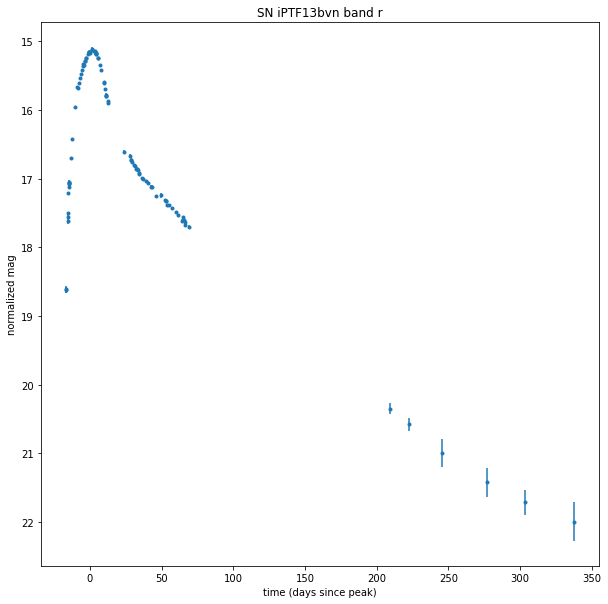

In [26]:
b = 'r'
xmin = thissn.photometry[b]['mjd'].min()
x = thissn.photometry[b]['mjd'] - thissn.Vmax + 2400000.5
y = thissn.photometry[b]['mag'] 
# y = y.min() - y
yerr = thissn.photometry[b]['dmag']
pl.errorbar(x, y, yerr, fmt='.')
pl.title("SN %s band %s"%(sn, b))
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")
pl.gca().invert_yaxis()
# pl.xlim(-14,-10)
# pl.show()

### Fig 0

this is a rather difficult time series with gaps and early time variability, although there are harder ones (larger gaps, more noise).
Notice that the errorbars are plotted, but not visible, indicating gross underestimation of the uncertainty in the data.

# Finally Gaussian Processes

## GP in natural time space (hp = 100)

hyper parameters:  ConstantKernel(log_constant=0.31622776601683794, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(100.00000000000004, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)


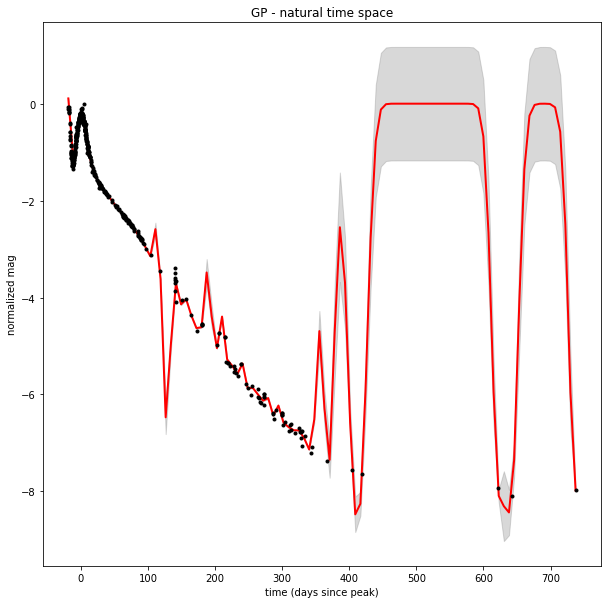

In [17]:
# Set up the Gaussian process.
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                         kernels.ExpSquaredKernel(100))
gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)

# Pre-compute the factorization of the matrix.

t = np.linspace(x.min(), x.max(), 100)
gp.compute(x, yerr)
mu, cov = gp.predict(y, t)
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.plot(t,mu, 'r', lw=2)
pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)
pl.title("GP - natural time space")
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


### Fig 2:

This naive gaussian process on the time series in natural space with guessed hyperparameters is not good to the overfitting at late time

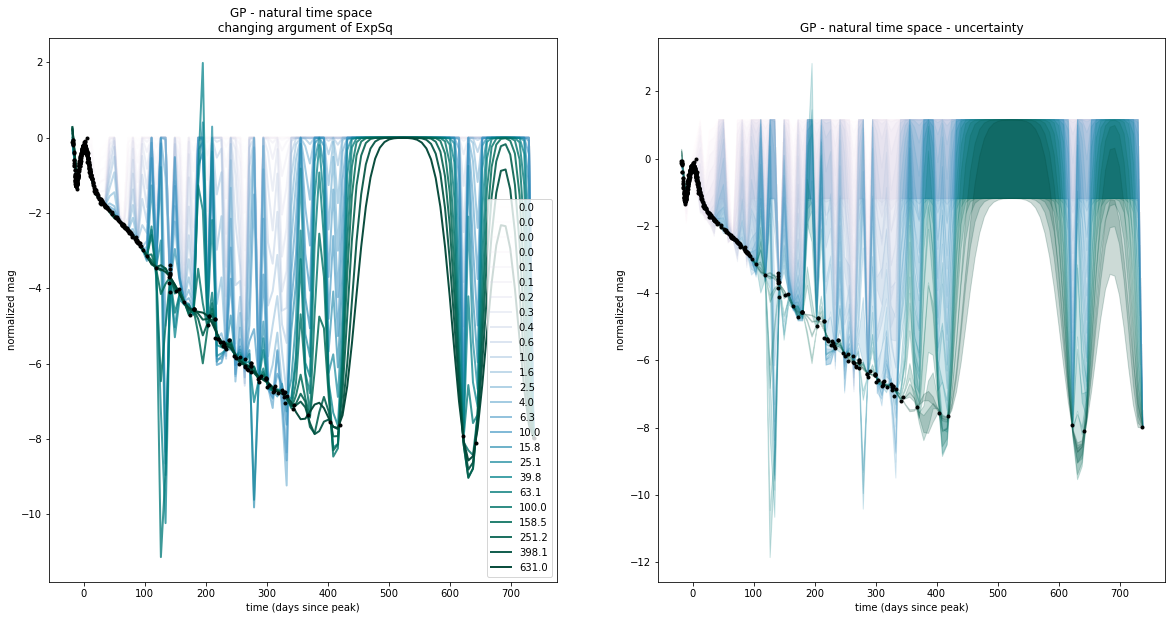

In [19]:
hps = np.arange(-2, 3, 0.2)
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.errorbar(x, y, yerr=yerr, fmt='k.')
ax2.errorbar(x, y, yerr=yerr, fmt='k.')

color=iter(pl.cm.PuBuGn(np.linspace(0,1,hps.shape[0])))
for i,k in enumerate(hps):
    c=next(color)
    kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(k)))
    gp = george.GP(kernel)
    try:
        gp.compute(x, yerr)
    except ValueError:
        print (" no solution for k", k)
        continue
    mu, cov = gp.predict(y, t)
    std = np.sqrt(np.diag(cov))
    ax1.plot(t, mu, lw=2, color=c, alpha=float(i+1)/(hps.shape[0]+1), label="%.1f"%10**k)
    #print (ax._get_lines.color_cycle[-1])
    ax2.fill_between(t, mu-std, mu+std, color=c, alpha=0.2)
ax1.set_title("GP - natural time space \n changing argument of ExpSq")
ax2.set_title("GP - natural time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
ax1.legend()
ax1.set_xlabel("time (days since peak)")
xl = ax2.set_xlabel("time (days since peak)")


### Fig 3:

No fit is both appropriate at early times, respecting the structure of the data (double bump) while avoiding overfitting at late times. Given the data structures this is entirely reasonable as the noisy data has a comparable variance at late time and at early time, though the late time variance is noise and the early time variance is a feature in the time series!

## GP in log space (hp = 1)

hyper parameters:  ConstantKernel(log_constant=0.31622776601683794, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(1.0, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)


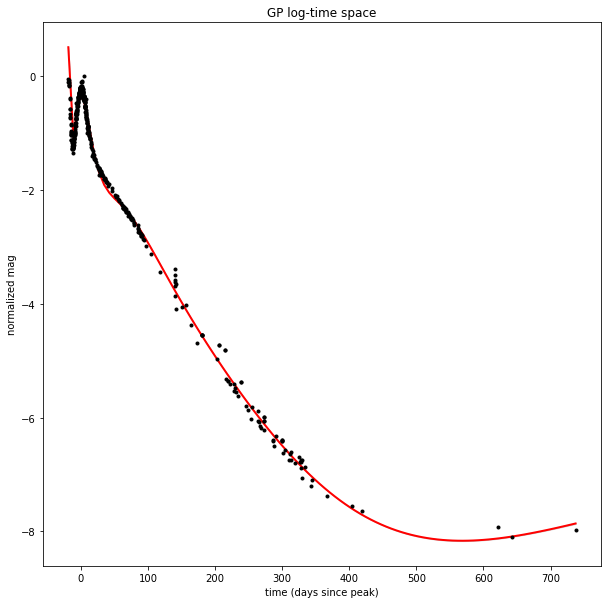

In [21]:
# Set up the Gaussian process.
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                         kernels.ExpSquaredKernel(1))
gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)

# Pre-compute the factorization of the matrix.


gp.compute(np.log(x+30), yerr)
mu, cov = gp.predict(y, np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.title("GP log-time space")
pl.plot(t , mu, 'r', lw=2)
pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


### Fig 3

On the other end this GP on the log time with guessed parameters is too smooth at early times.

# Dependency of fit on hyperparameters

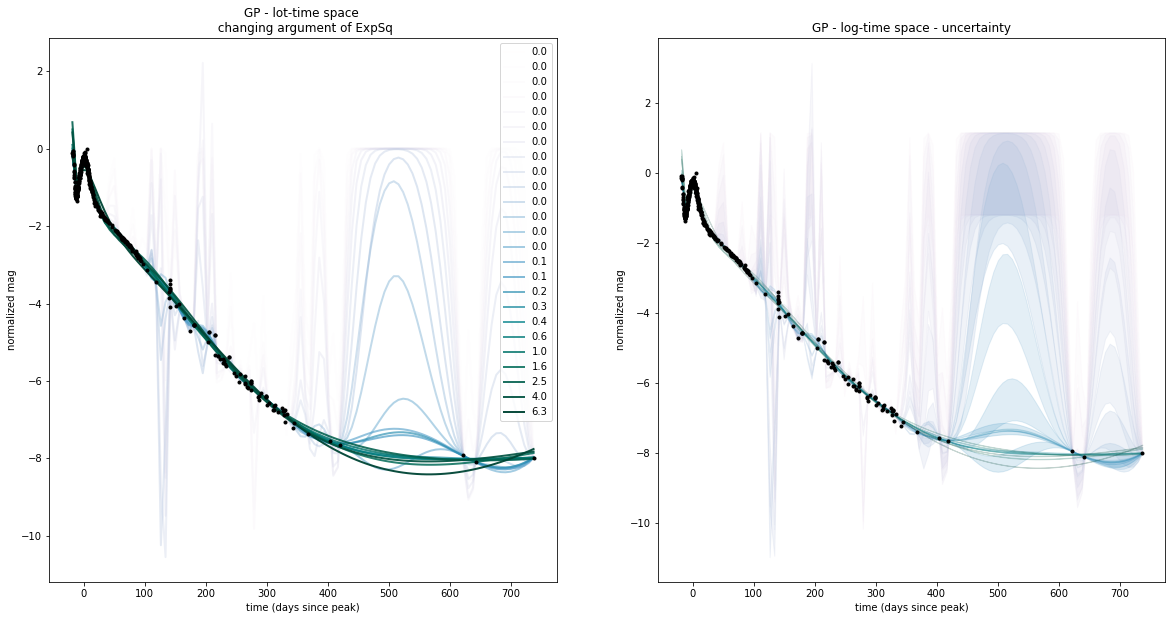

In [23]:
hps = np.arange(-4, 1, 0.2)
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.errorbar(x, y, yerr=yerr, fmt='k.')
ax2.errorbar(x, y, yerr=yerr, fmt='k.')

color=iter(pl.cm.PuBuGn(np.linspace(0,1,hps.shape[0])))

for i,k in enumerate(hps):
    c=next(color)
    gp = george.GP(kernel)
    kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(k)))
    try:
        gp.compute(np.log(x+30), yerr)
    except ValueError:
        print (" no solution for k", k)
        continue
               
    mu, cov = gp.predict(y, np.log(t+30))
    std = np.sqrt(np.diag(cov))
    ax1.plot(t, mu, lw=2, color=c, alpha=float(i+1)/(hps.shape[0]+1), label="%.1f"%10**k)
    #print (ax._get_lines.color_cycle[-1])
    ax2.fill_between(t, mu-std, mu+std, color=c, alpha=0.2)
ax1.set_title("GP - lot-time space \n changing argument of ExpSq")
ax2.set_title("GP - log-time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
ax1.legend()
ax1.set_xlabel("time (days since peak)")
xl = ax2.set_xlabel("time (days since peak)")


### Fig 4

By working in lot-time space we are stretching the space between early datapoints and the fit better acknowledges early time structure while maintainging smoothness at late time. The error bands, however, are far too small in the region of the hyperparameter space where the fit is good.

# Increasing the data uncertainty (hp = 0.1)

hyper parameters:  ConstantKernel(log_constant=0.31622776601683794, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(0.10000000000000002, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)


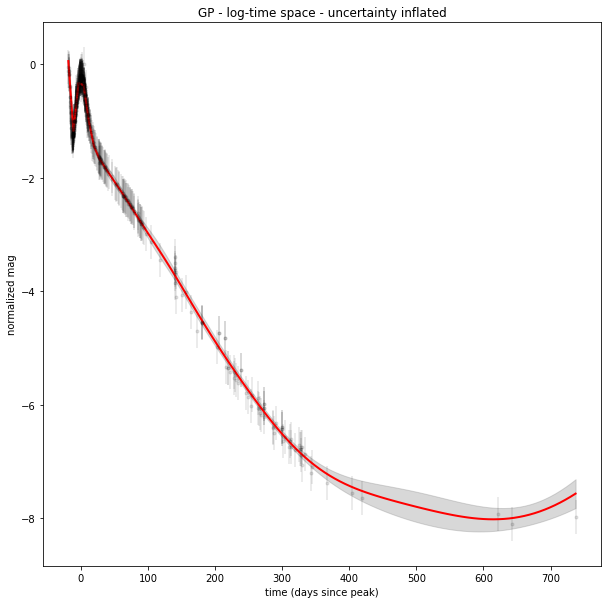

In [24]:
# Set up the Gaussian process.
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                         kernels.ExpSquaredKernel(0.1))

gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)

# Pre-compute the factorization of the matrix.

gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y, np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)

pl.title("GP - log-time space - uncertainty inflated")
pl.plot(t , mu, 'r', lw=2)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)

### Fig 5:

Inflating the errorbars gives me a reasonable error in the fit, where reasonable here is error band that contains a smooth late time behavior, but the errorbars here are inflated by a whooping factor of 30, which is by eye obviously more than the true errors should be 

## Optimizing the hyper parameters

In [25]:
t = np.linspace(x.min(), x.max(), 100)
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                         kernels.ExpSquaredKernel(0.1))

gp = george.GP(kernel)

def der(xy):
    x,y  = xy[0],xy[1]
    return [(y[1]-y[:-1] ) / np.diff(y)[0],  x ] 

def nll(p, y, x, gp):
    smoothness = np.nansum(np.abs(der(der([gp.predict(y,x)[0], x]))),axis=1)[0]
    # Update the kernel parameters and compute the likelihood.
    smoothness = smoothness if np.isfinite(smoothness) and ~np.isnan(smoothness) else 1e25
    gp.kernel.parameter_vector = p
    ll = gp.lnlikelihood(y, quiet=True) + (smoothness)

    return -ll if np.isfinite(ll) else 1e25

def grad_nll(p, y, x, gp):
    # Update the kernel parameters and compute the likelihood.
    gp.kernel.parameter_vector = p
    #print ("here", smoothness)
    return -gp.grad_lnlikelihood(y, quiet=True) 

p0 = gp.kernel.parameter_vector
print ("hyper parameters", p0)

hyper parameters [ 0.31622777 -2.30258509]


In [26]:
gp.compute(x, yerr)

results = op.minimize(nll, p0, jac=grad_nll, args=(y, t, gp))
    #    # Update the kernel and print the final log-likelihood.
gp.kernel.parameter_vector = results.x
print ("hyper parameters: ",gp.kernel)
print("loglikelihood", gp.lnlikelihood(y))


hyper parameters:  ConstantKernel(log_constant=1.302677174547721, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(0.18353589418983512, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)
loglikelihood -1925.15235039025


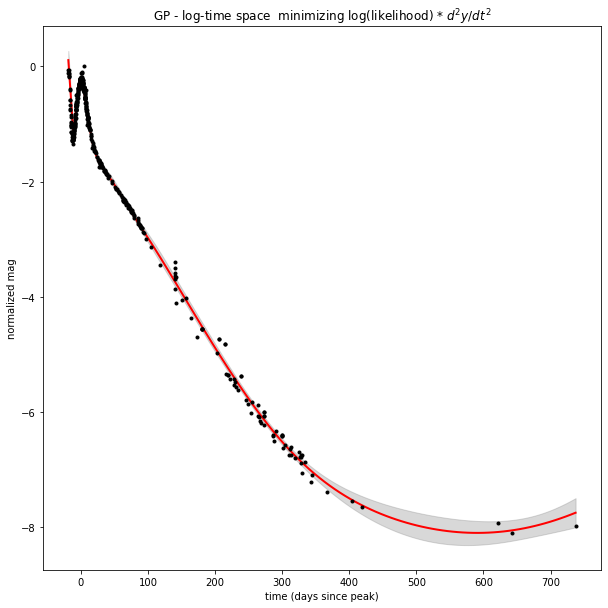

In [27]:
# Set up the Gaussian process.

# Pre-compute the factorization of the matrix.

gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y, np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.title(r"GP - log-time space  minimizing $\log(\mathrm{likelihood})$ * $d^2y/dt^2$")
ax2.set_title("GP - log-time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
pl.plot(t , mu, 'r', lw=2)
pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


# Subracting the mean and fitting GP to residuals only

In [27]:
import pickle
b ='r'
#spl = InterpolatedUnivariateSpline(templ.phs, ysmooth)
templatePkl = "./../Somayeh_contributions/main/outputs2/UberTemplate_%s.pkl" % \
                   (b + 'p' if b in ['u', 'r', 'i']
                                            else b)
with open(templatePkl, 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tmpl = u.load()
# tmpl = pkl.load(open(templatePkl, "rb"))
# tmpl['mu'] = -tmpl['mu']
print ("Template for the current band", templatePkl)
tmpl


Template for the current band ./../Somayeh_contributions/main/outputs2/UberTemplate_rp.pkl


{'phs': array([-20.02083333, -19.97916667, -19.9375    , ...,  99.97916667,
        100.02083333, 100.0625    ]),
 'mu': array([0.9508008 , 0.94980525, 0.94880672, ..., 1.13294323, 1.13358434,
        1.13422855]),
 'wgstd': array([0.3865597 , 0.38652286, 0.38648102, ..., 0.31975415, 0.32040226,
        0.321053  ]),
 'std': array([1.40545774, 1.42745531, 1.42745531, ...,        nan,        nan,
               nan]),
 'pc25': array([0.21274996, 0.26524973, 0.26524973, ...,        nan,        nan,
               nan]),
 'pc75': array([1.1467495 , 1.20525026, 1.20525026, ...,        nan,        nan,
               nan]),
 'med': array([1.05899906, 1.07699966, 1.07699966, ...,        nan,        nan,
               nan]),
 'med_smoothed': array([1.05899906, 1.05911955, 1.05926523, ...,        nan,        nan,
               nan]),
 'wratio': array([39.80461502, 40.20575333, 40.20575333, ...,         nan,
                nan,         nan]),
 'epochs_mu': array([-22.5       , -22.45833333, 

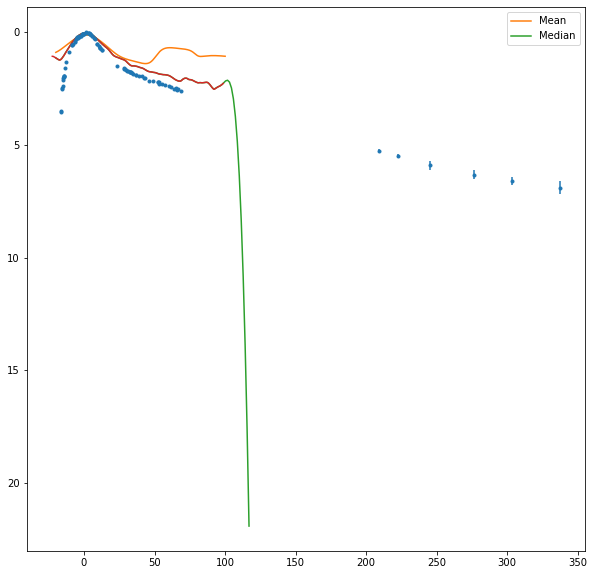

In [34]:
from scipy.interpolate import InterpolatedUnivariateSpline

t_new = np.linspace(-20,117, 100)

xmin = thissn.photometry[b]['mjd'].min()
x = thissn.photometry[b]['mjd'] - thissn.Vmax + 2400000.5
y = thissn.photometry[b]['mag'] 
y = y- y.min() 
yerr = thissn.photometry[b]['dmag']
pl.errorbar(x, y, yerr, fmt='.')
pl.plot(tmpl['phs'], tmpl['spl_mu'](tmpl['phs']),'-', label = 'Mean')
pl.plot(t_new, InterpolatedUnivariateSpline(tmpl['epochs_med'],\
                                            tmpl['med_smoothed'][~np.isnan(tmpl['med_smoothed'])])(t_new),\
        '-', label='Median')
pl.plot(tmpl['epochs_med'], tmpl['med_smoothed'][~np.isnan(tmpl['med_smoothed'])])
pl.gca().invert_yaxis()
pl.legend()

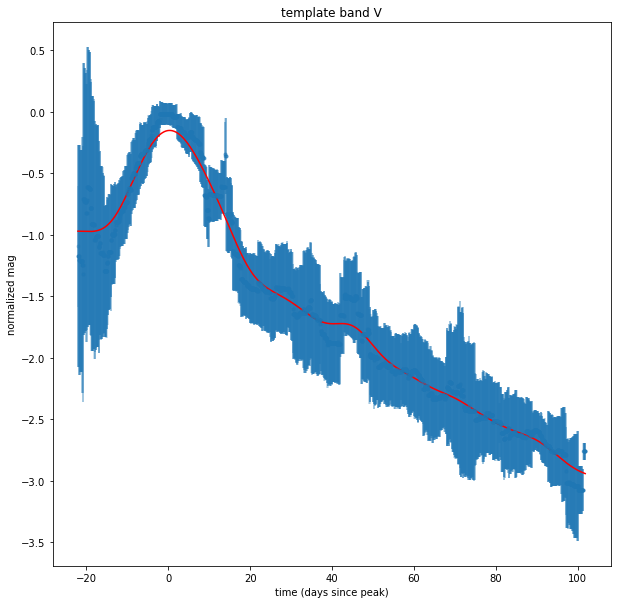

In [43]:
tmpl['musmooth'] = -tmpl['spl'](tmpl['phs'])
ax = pl.figure().add_subplot(111)
ax.errorbar(tmpl['phs'], tmpl['mu'], yerr=tmpl['std'], fmt='.', alpha=0.3)
ax.plot(tmpl['phs'], tmpl['musmooth'], 'r')
meansmooth = lambda x : -tmpl['spl'](x) + tmpl['spl'](0)  
pl.title("template band %s"%b)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


### Fig 6:
this is a mean template for U band from all SESN. Notice the large variance, especially at early times, which is just a reflection of the diversity in the sample, and in the population

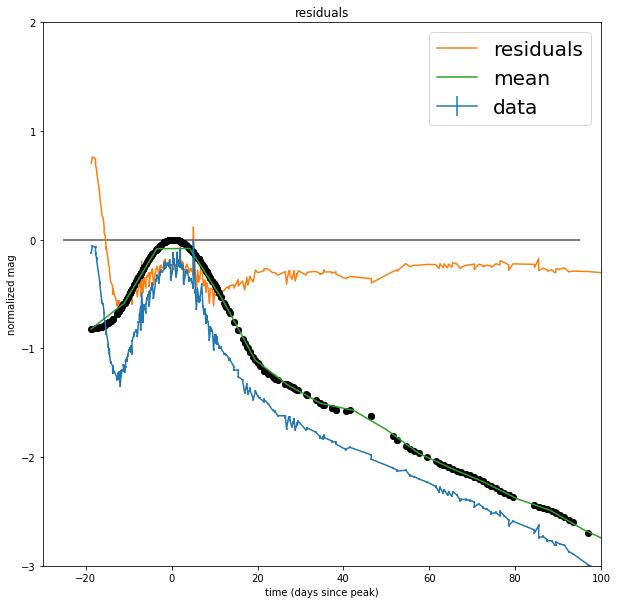

In [44]:
# Set up the Gaussian process.


pl.errorbar(x, y, yerr=yerr, label="data")
pl.plot([-25,95],[0,0], 'k-', alpha=0.5, lw=2)
pl.plot(x, y - meansmooth(x), label="residuals")
pl.plot(x, meansmooth(x), 'ko')
pl.plot(t, meansmooth(t), label="mean")
pl.legend(fontsize=20)
pl.ylim(-3,2)
pl.xlim(-30,100)
pl.title("residuals")
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

### Fig 7: 
residuals

## GP in natural space - mean removed (hp = 100)

hyper parameters:  ConstantKernel(log_constant=0.31622776601683794, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(100.00000000000004, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)


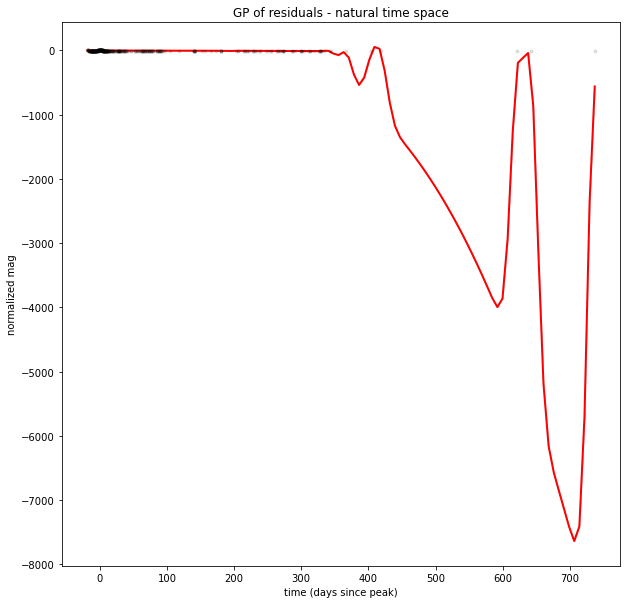

In [48]:
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                         kernels.ExpSquaredKernel(100))
gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)
gp.compute(x, yerr * errorbarInflate[sn])

pl.figure()
mu, cov = gp.predict(y - meansmooth(x), t)
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)

pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
# pl.ylim(-3.5,0.5)

pl.title("GP of residuals - natural time space")
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

### Fig 8: 
the fit in natural space is still too smooth at early times and overfitting at late times

## GP in log space - mean removed (hp=0.01)

hyperparameters ConstantKernel(log_constant=0.31622776601683794, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(0.010000000000000004, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)


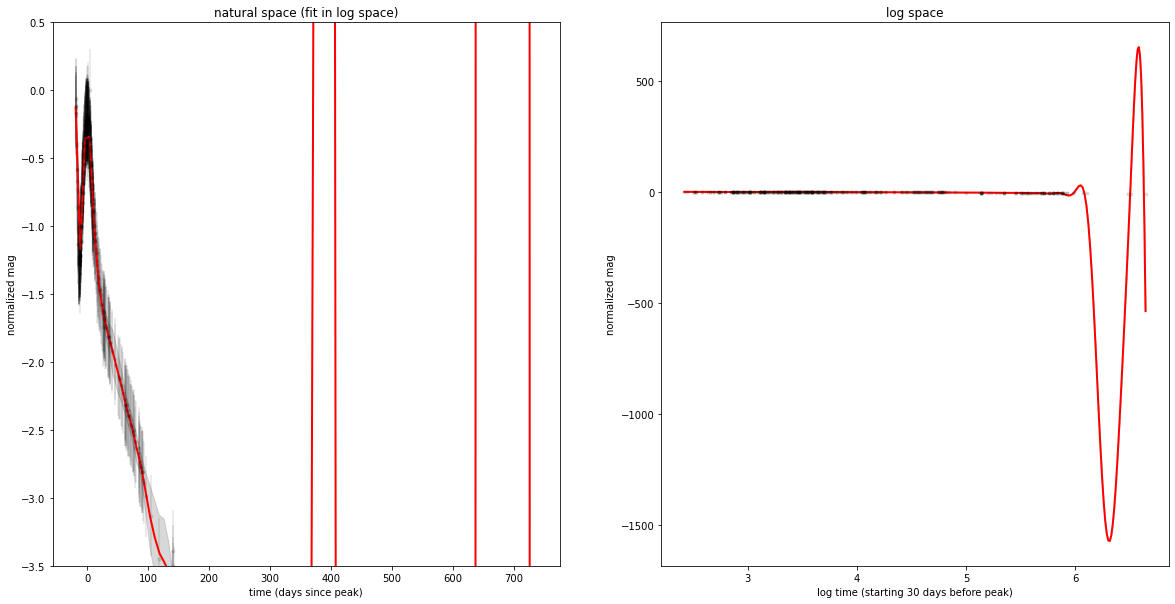

In [49]:
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                         kernels.ExpSquaredKernel(0.01))
gp = george.GP(kernel)
print ("hyperparameters", gp.kernel)

fig = pl.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("natural space (fit in log space)")
pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

fig.add_subplot(1,2,2)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(np.log(x+30), y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("log space")
pl.plot(np.log(t+30), mu + meansmooth(t), 'r', lw=2)
pl.fill_between(np.log(t+30), 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
# pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("log time (starting 30 days before peak)")

### Fig 9:
In log space I again get a better fit at early time, still overfitting at late time, but with larger uncertainty band.

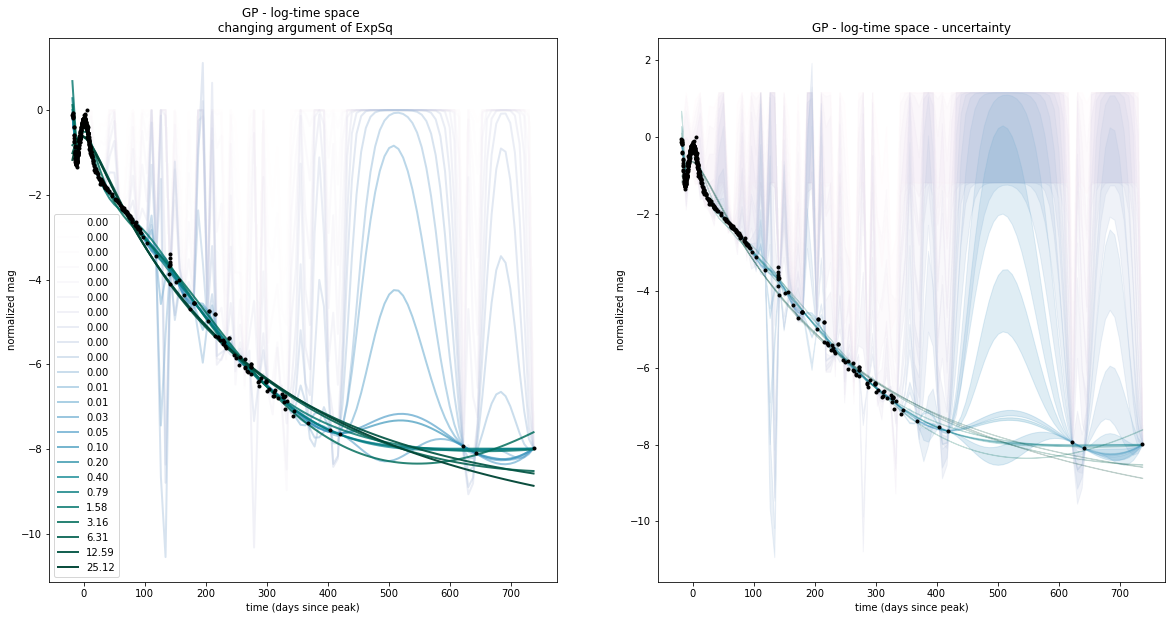

In [51]:
hps = np.arange(-5.5, 1.5, 0.3)
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.errorbar(x, y, yerr=yerr, fmt='k.')
ax2.errorbar(x, y, yerr=yerr, fmt='k.')

color=iter(pl.cm.PuBuGn(np.linspace(0,1, hps.shape[0])))

for i,k in enumerate(hps):
    c=next(color)
    
    kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(k)))
    gp = george.GP(kernel)
    try:
        gp.compute(np.log(x+30), yerr)
    except ValueError:
        print (" no solution for k", k)
        continue
               
    mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
    std = np.sqrt(np.diag(cov))
    mu, cov = gp.predict(y, np.log(t+30))
    std = np.sqrt(np.diag(cov))
    ax1.plot(t, mu, lw=2, color=c, alpha=float(i+1)/(hps.shape[0]+1), label="%.2f"%10**k)
    #print (ax._get_lines.color_cycle[-1])
    ax2.fill_between(t, mu-std, mu+std, color=c, alpha=0.2)
ax1.set_title("GP - log-time space \n changing argument of ExpSq")
ax2.set_title("GP - log-time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
ax1.legend()
ax1.set_xlabel("time (days since peak)")
xl = ax2.set_xlabel("time (days since peak)")


### Fig 10:
Altogether not much difference from firring the SN directly

# Parameters optimization

In [53]:
kernel = kernels.Product(kernels.ConstantKernel(np.sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(1)))
#kernel = kernels.ExpSquaredKernel(10**(5))
gp.kernel = kernel
print ("hyperparameters", gp.kernel)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
results = op.minimize(nll, p0, jac=grad_nll, args=(y - meansmooth(x), 
                                                   np.log(t+30), gp))
    #    # Update the kernel and print the final log-likelihood.
print (results)
gp.kernel[:] = results.x
print ("hyperparameters", gp.kernel)
print("log likelihood", gp.lnlikelihood(y))


fig = pl.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("natural space (fit in log space)")
pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

fig.add_subplot(1,2,2)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(np.log(x+30), y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.plot(np.log(t+30), mu + meansmooth(t), 'r', lw=2)
pl.fill_between(np.log(t+30), 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.title("log space")
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("log time (starting 30 days before peak)")


hyperparameters ConstantKernel(log_constant=0.31622776601683794, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(10.000000000000002, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)
      fun: -144054.0445764139
 hess_inv: array([[3.18493930e-02, 4.27242216e-04],
       [4.27242216e-04, 3.86253340e-05]])
      jac: array([  -2.065555  , -143.81138607])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 48
      nit: 29
     njev: 36
   status: 2
  success: False
        x: array([14.31778076, -3.8068862 ])


AttributeError: 'slice' object has no attribute 'split'

### Fig 11:
Optmimization is done by minimizing the log likelihood + second derivative. Parameter optimization for log-time: still some overfitting at late time, in fact the optimize solution is a bit worse for my purpose than the guessed hyperparameters in fig 9.

# meanwhile, arctan does not have the right properties
since it expands the time near peak but the sharpest changes are expected before peak

('hyperparameters', ConstantKernel(0.744440971564, ndim=1) * ExpSquaredKernel(0.0585206474677, ndim=1))
('log likelihood', -14.609227976713342)


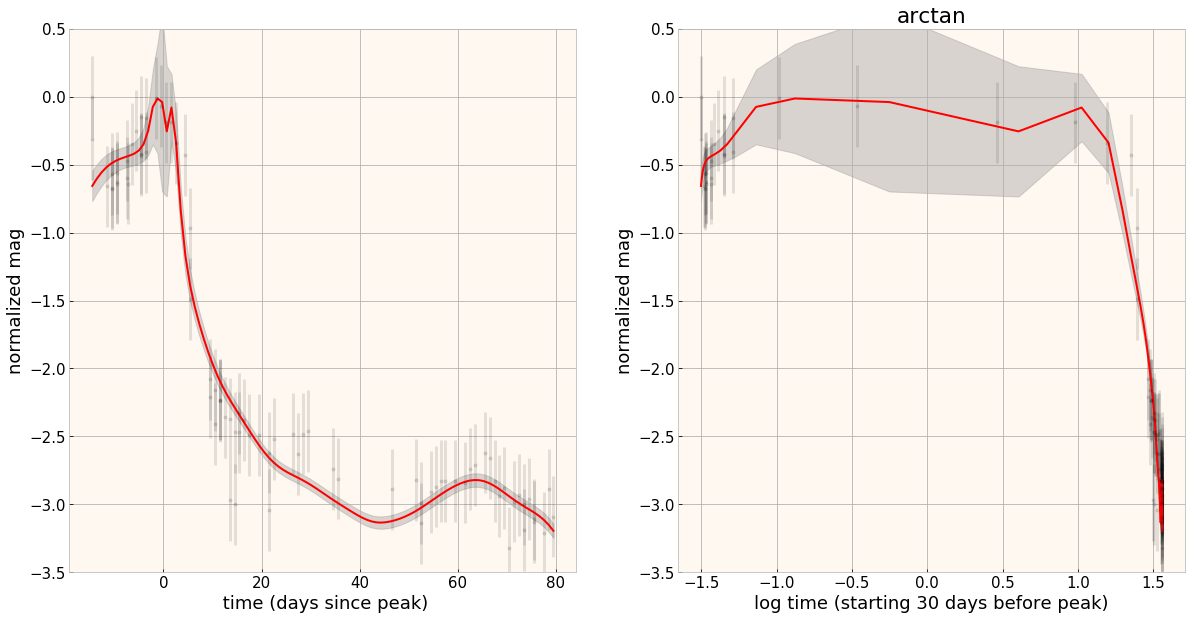

In [26]:
gp.compute(np.arctan(x), yerr * errorbarInflate[sn])
results = op.minimize(nll, p0, jac=grad_nll, args=(y, np.log(t+30), gp))
    #    # Update the kernel and print the final log-likelihood.
gp.kernel[:] = results.x
print ("hyperparameters", gp.kernel)
print ("log likelihood", gp.lnlikelihood(y))


fig = pl.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
mu, cov = gp.predict(y - meansmooth(x), np.arctan(t))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel(" time (days since peak)")

fig.add_subplot(1,2,2)
gp.compute(np.arctan(x), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.arctan(t))
std = np.sqrt(np.diag(cov))
pl.errorbar(np.arctan(x), y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("arctan")
pl.plot(np.arctan(t), mu + meansmooth(t), 'r', lw=2)
pl.fill_between(np.arctan(t), 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("log time (starting 30 days before peak)")


### Fig 12:
arctan time is not the right fuction as we expect the highest variability at early times

# Conclusion
In conclusion the fits are much better than they used to be once I set the 0 point of the log time to -30 days, which is significantly earlier than any datapoint I have in my sample, so that the first datapoint is far away from a singularity. However the errorbands are concerningly small. I think I would know how to obtain similar fits but larget uncertainties in sklearn, but not in george. Suggestions?
